In [ ]:
raw_text = """
Wayang adalah seni pertunjukan tradisional Indonesia yang berkembang di Pulau Jawa dan Bali. Wayang memiliki berbagai jenis, seperti wayang kulit, wayang golek, dan wayang orang, masing-masing mencerminkan budaya dan filosofi masyarakat tempatnya berasal.

Batik adalah teknik pewarnaan kain dengan menggunakan malam (lilin) sebagai perintang warna. Batik tidak hanya menjadi simbol budaya Jawa tetapi juga telah diakui UNESCO sebagai Warisan Budaya Takbenda Dunia. Motif batik sangat beragam dan sarat makna filosofis.

Tari kecak berasal dari Bali dan dikenal dengan paduan suara pria yang duduk melingkar dan meneriakkan "cak" secara ritmis. Tarian ini sering mengisahkan cerita Ramayana dan biasanya ditampilkan di tempat wisata seperti Uluwatu.

Angklung adalah alat musik tradisional dari Jawa Barat yang terbuat dari bambu dan dimainkan dengan cara digoyangkan. Alat musik ini juga telah mendapatkan pengakuan dunia sebagai warisan budaya dari Indonesia. Permainan angklung biasanya dilakukan secara berkelompok dan menciptakan harmoni unik.

Selain itu, rumah adat Indonesia mencerminkan kekayaan arsitektur tradisional yang berbeda-beda di setiap daerah. Misalnya, rumah Gadang dari Minangkabau, rumah Joglo dari Jawa Tengah, dan rumah Tongkonan dari Toraja. Setiap rumah memiliki bentuk, fungsi, dan makna simbolis yang erat kaitannya dengan nilai-nilai leluhur.
"""

In [ ]:
import nltk
import spacy
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Karena tokenizer 'indonesian' tidak tersedia di NLTK, kita gunakan default ('english') untuk demo
# atau kita split secara manual jika ingin bebas error.
tokens_nltk = raw_text.split()  # alternatif manual

# Tokenisasi dengan spaCy
nlp = spacy.load('xx_ent_wiki_sm')
doc = nlp(raw_text)
tokens_spacy = [token.text for token in doc if not token.is_space and not token.is_punct]

print(f"NLTK tokens (10 pertama): {tokens_nltk[:10]}")
print(f"spaCy tokens (10 pertama): {tokens_spacy[:10]}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NLTK tokens (10 pertama): ['Wayang', 'adalah', 'seni', 'pertunjukan', 'tradisional', 'Indonesia', 'yang', 'berkembang', 'di', 'Pulau']
spaCy tokens (10 pertama): ['Wayang', 'adalah', 'seni', 'pertunjukan', 'tradisional', 'Indonesia', 'yang', 'berkembang', 'di', 'Pulau']


In [ ]:
sentences = [line.split() for line in raw_text.split('\n') if line.strip()]

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    seed=42
)

# Contoh penggunaan
if 'budaya' in model.wv:
    print('Kata mirip "budaya":', model.wv.most_similar('budaya', topn=5))
else:
    print('Kata "budaya" tidak ditemukan dalam model.')

Kata mirip "budaya": [('Tongkonan', 0.34320688247680664), ('fungsi,', 0.3215961158275604), ('tempatnya', 0.2666258215904236), ('Permainan', 0.20606417953968048), ('arsitektur', 0.1904875487089157)]


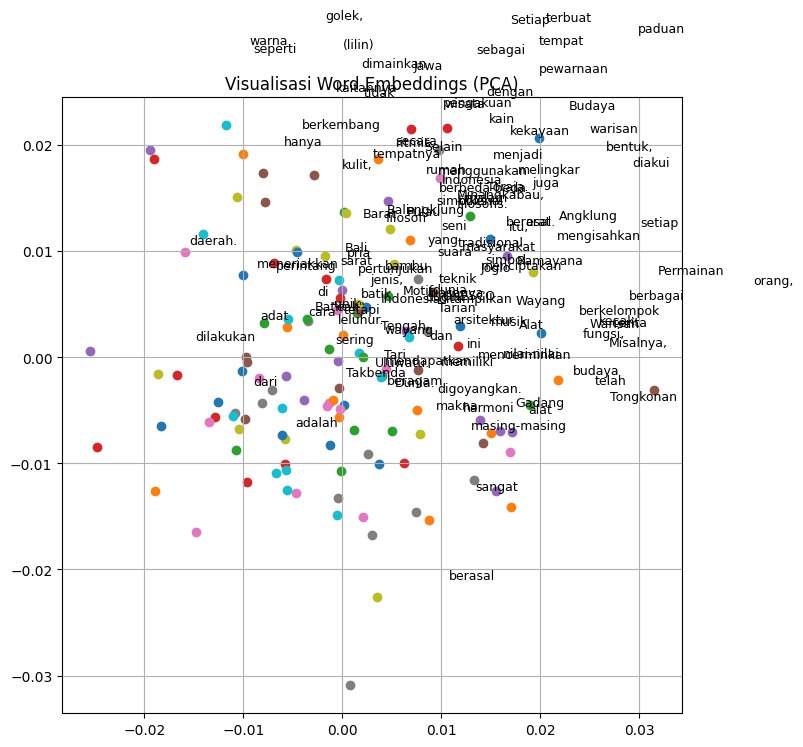

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)

plt.figure(figsize=(8, 8))
for i, word in enumerate(words):
    x, y = coords[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9)
plt.title('Visualisasi Word Embeddings (PCA)')
plt.grid(True)
plt.show()
